#TCS LSTM

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 0.1592
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0222
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0345
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 0.

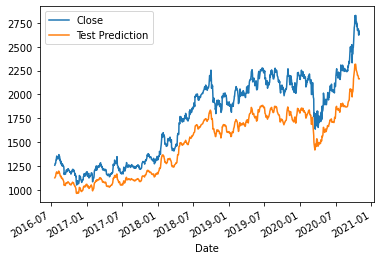

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier

from keras.preprocessing.sequence import TimeseriesGenerator

fb=pd.read_csv('TCS.NS.csv',parse_dates=True,index_col='Date')
fb.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

fb = fb.fillna(method="bfill")

train_fb=fb[:2112]
test_fb=fb[2112:]

dataset = fb
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.667)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


n_inputs=3
train_data_gen = TimeseriesGenerator(train, train,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

test_data_gen = TimeseriesGenerator(test, test,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(1000, activation='relu', input_shape=(n_inputs, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.fit_generator(train_data_gen, steps_per_epoch=1, epochs=50)


trainPredict = lstm_model.predict(train_data_gen)

testPredict = lstm_model.predict(test_data_gen)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

print("Prediction on Train Set ")
print(trainPredict)


# train_values=[]
# for i in range(len(trainPredict)):
#     train_values.append(trainPredict.astype(float)[i][0])
    
# test_values=[]
# for i in range(len(testPredict)):
#     test_values.append(testPredict.astype(float)[i][0])    

x = testPredict[-1]
for i in range(3):
  testPredict = np.append(testPredict, x)

x = trainPredict[-1]
for i in range(3):
  trainPredict = np.append(trainPredict, x)


print(len(trainPredict))

train_fb['pred']=trainPredict
test_fb['pred']=testPredict

test_fb['Close'].plot(legend=True)
test_fb['pred'].plot(legend=True,label='Test Prediction')


from statsmodels.tools.eval_measures import rmse

print("RMSE VALUE: ")
rmse(train_fb['pred'],train_fb['Close'])  


from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(train_fb['Close'], train_fb['pred'])))
print("Mean Absolute Percentage Error: " + str(mape(train_fb['Close'], train_fb['pred'])))





In [6]:
rmse(train_fb['pred'],train_fb['Close']) 

92.59947066805522

#DRREDDY LSTM


Epoch 1/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0263
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 5.6584e-04
Epoch 3/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 8.3479e-04
Epoch 5/50
50/50 [==============================] - 0s 8ms/step - loss: 3.9783e-04
Epoch 6/50
50/50 [==============================] - 0s 8ms/step - loss: 6.1945e-04
Epoch 7/50
50/50 [==============================] - 0s 8ms/step - loss: 3.7640e-04
Epoch 8/50
50/50 [==============================] - 0s 8ms/step - loss: 3.6297e-04
Epoch 9/50
50/50 [==============================] - 0s 8ms/step - loss: 2.0649e-04
Epoch 10/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 11/50
50/50 [==============================] - 0s 8ms/step - loss: 4.0495e-04
Epoch 12/50
50/50 [==============================] - 0s 8ms/step - loss: 1.9083e-04
Epoch 13/50
5

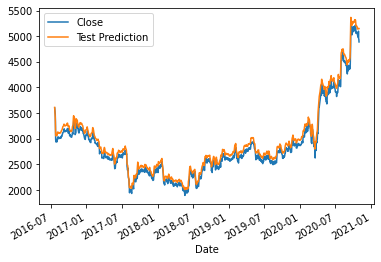

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier

from keras.preprocessing.sequence import TimeseriesGenerator

fb=pd.read_csv('DRREDDY.NS.csv',parse_dates=True,index_col='Date')
fb.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

fb = fb.fillna(method="bfill")

train_fb=fb[:2112]
test_fb=fb[2112:]

dataset = fb
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.667)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


n_inputs=3
train_data_gen = TimeseriesGenerator(train, train,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

test_data_gen = TimeseriesGenerator(test, test,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(1000, activation='relu', input_shape=(n_inputs, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.fit_generator(train_data_gen, steps_per_epoch=50, epochs=50)


trainPredict = lstm_model.predict(train_data_gen)

testPredict = lstm_model.predict(test_data_gen)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

print("Prediction on Train Set ")
print(trainPredict)


# train_values=[]
# for i in range(len(trainPredict)):
#     train_values.append(trainPredict.astype(float)[i][0])
    
# test_values=[]
# for i in range(len(testPredict)):
#     test_values.append(testPredict.astype(float)[i][0])    

x = testPredict[-1]
for i in range(3):
  testPredict = np.append(testPredict, x)

x = trainPredict[-1]
for i in range(3):
  trainPredict = np.append(trainPredict, x)


print(len(trainPredict))

train_fb['pred']=trainPredict
test_fb['pred']=testPredict

test_fb['Close'].plot(legend=True)
test_fb['pred'].plot(legend=True,label='Test Prediction')


from statsmodels.tools.eval_measures import rmse

print("RMSE VALUE: ")
rmse(train_fb['pred'],train_fb['Close'])  


from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(train_fb['Close'], train_fb['pred'])))
print("Mean Absolute Percentage Error: " + str(mape(train_fb['Close'], train_fb['pred'])))




In [22]:

rmse(train_fb['pred'],train_fb['Close'])  

76.89612480323537

#GAIL LSTM

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 4.9609e-04
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1500
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1219
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1496
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0872
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss

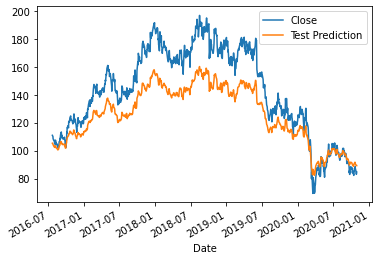

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier

from keras.preprocessing.sequence import TimeseriesGenerator

fb=pd.read_csv('GAIL.NS.csv',parse_dates=True,index_col='Date')
fb.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

fb = fb.fillna(method="bfill")

train_fb=fb[:2112]
test_fb=fb[2112:]

dataset = fb
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.667)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


n_inputs=3
train_data_gen = TimeseriesGenerator(train, train,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

test_data_gen = TimeseriesGenerator(test, test,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(1000, activation='relu', input_shape=(n_inputs, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.fit_generator(train_data_gen, steps_per_epoch=1, epochs=50)


trainPredict = lstm_model.predict(train_data_gen)

testPredict = lstm_model.predict(test_data_gen)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

print("Prediction on Train Set ")
print(trainPredict)


# train_values=[]
# for i in range(len(trainPredict)):
#     train_values.append(trainPredict.astype(float)[i][0])
    
# test_values=[]
# for i in range(len(testPredict)):
#     test_values.append(testPredict.astype(float)[i][0])    

x = testPredict[-1]
for i in range(3):
  testPredict = np.append(testPredict, x)

x = trainPredict[-1]
for i in range(3):
  trainPredict = np.append(trainPredict, x)


print(len(trainPredict))

train_fb['pred']=trainPredict
test_fb['pred']=testPredict

test_fb['Close'].plot(legend=True)
test_fb['pred'].plot(legend=True,label='Test Prediction')


from statsmodels.tools.eval_measures import rmse

print("RMSE VALUE: ")
print(rmse(train_fb['pred'],train_fb['Close'])  )

from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(train_fb['Close'], train_fb['pred'])))
print("Mean Absolute Percentage Error: " + str(mape(train_fb['Close'], train_fb['pred'])))


In [8]:

rmse(train_fb['pred'],train_fb['Close'])  

10.561027413721261

#HUL LSTM

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0771
Epoch 2/50
1/1 [==============================] - 0s 932us/step - loss: 0.0015
Epoch 3/50
1/1 [==============================] - 0s 965us/step - loss: 3.3797e-04
Epoch 4/50
1/1 [==============================] - 0s 947us/step - loss: 5.2465e-04
Epoch 5/50
1/1 [==============================] - 0s 936us/step - loss: 0.0088
Epoch 6/50
1/1 [==============================] - 0s 899us/step - loss: 8.3884e-05
Epoch 7/50
1/1 [==============================] - 0s 851us/step - loss: 6.2768e-04
Epoch 8/50
1/1 [==============================] - 0s 882us/step - loss: 2.2457e-07
Epoch 9/50
1/1 [==============================] - 0s 967us/step - loss: 2.6937e-04
Epoch 10/50
1/1 [==============================] - 0s 924us/step - loss: 6.9518e-04
Epoch 11/50
1/1 [==============================] - 0s 953us/step - loss: 0.0013
Epoch 12/50
1/1 [==============================] - 0s 968us/step - loss: 6.0123e-07
Epoch 13/50
1/1 [==

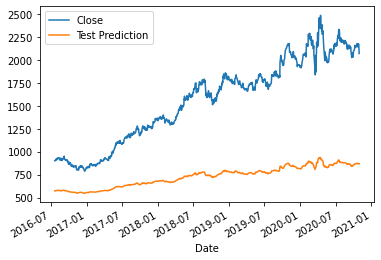

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier

from keras.preprocessing.sequence import TimeseriesGenerator

fb=pd.read_csv('HINDUNILVR.NS.csv',parse_dates=True,index_col='Date')
fb.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

fb = fb.fillna(method="bfill")

train_fb=fb[:2112]
test_fb=fb[2112:]

dataset = fb
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.667)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


n_inputs=3
train_data_gen = TimeseriesGenerator(train, train,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

test_data_gen = TimeseriesGenerator(test, test,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_inputs, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.fit_generator(train_data_gen, steps_per_epoch=1, epochs=50)


trainPredict = lstm_model.predict(train_data_gen)

testPredict = lstm_model.predict(test_data_gen)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

print("Prediction on Train Set ")
print(trainPredict)


# train_values=[]
# for i in range(len(trainPredict)):
#     train_values.append(trainPredict.astype(float)[i][0])
    
# test_values=[]
# for i in range(len(testPredict)):
#     test_values.append(testPredict.astype(float)[i][0])    

x = testPredict[-1]
for i in range(3):
  testPredict = np.append(testPredict, x)

x = trainPredict[-1]
for i in range(3):
  trainPredict = np.append(trainPredict, x)


print(len(trainPredict))

train_fb['pred']=trainPredict
test_fb['pred']=testPredict

test_fb['Close'].plot(legend=True)
test_fb['pred'].plot(legend=True,label='Test Prediction')


from statsmodels.tools.eval_measures import rmse

print("RMSE VALUE: ")
print(rmse(train_fb['pred'], train_fb['Close'])  )



from sklearn.metrics import mean_absolute_error as mae

def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("Mean Absolute Error: " + str(mae(train_fb['Close'], train_fb['pred'])))
print("Mean Absolute Percentage Error: " + str(mape(train_fb['Close'], train_fb['pred'])))



In [18]:

rmse(train_fb['pred'],train_fb['Close'])  

210.8280477369782

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 7.0443e-05
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 4.8830e-04
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.5002e-04
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 1.7080e-05
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 8.9757e-04
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 13/50
1/1 [==============================] - 0s

117.8171156377254

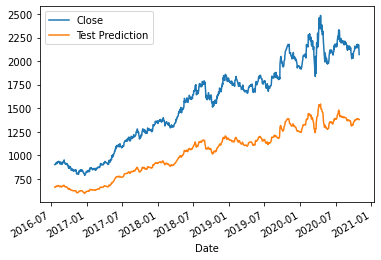

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier

from keras.preprocessing.sequence import TimeseriesGenerator

fb=pd.read_csv('HINDUNILVR.NS.csv',parse_dates=True,index_col='Date')
fb.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

fb = fb.fillna(method="bfill")

train_fb=fb[:2112]
test_fb=fb[2112:]

dataset = fb
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.667)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


n_inputs=3
train_data_gen = TimeseriesGenerator(train, train,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

test_data_gen = TimeseriesGenerator(test, test,
                               length=n_inputs, sampling_rate=1,stride=1,
                               batch_size=1)

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(1000, activation='relu', input_shape=(n_inputs, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.fit_generator(train_data_gen, epochs=50, steps_per_epoch=1)

trainPredict = lstm_model.predict(train_data_gen)

testPredict = lstm_model.predict(test_data_gen)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

print("Prediction on Train Set ")
print(trainPredict)


# train_values=[]
# for i in range(len(trainPredict)):
#     train_values.append(trainPredict.astype(float)[i][0])
    
# test_values=[]
# for i in range(len(testPredict)):
#     test_values.append(testPredict.astype(float)[i][0])    

x = testPredict[-1]
for i in range(3):
  testPredict = np.append(testPredict, x)

x = trainPredict[-1]
for i in range(3):
  trainPredict = np.append(trainPredict, x)


print(len(trainPredict))

train_fb['pred']=trainPredict
test_fb['pred']=testPredict

test_fb['Close'].plot(legend=True)
test_fb['pred'].plot(legend=True,label='Test Prediction')


from statsmodels.tools.eval_measures import rmse

print("RMSE VALUE: ")
rmse(train_fb['pred'],train_fb['Close'])  






# Stacked LSTM

In [ ]:
stacked_model = Sequential()
'''
model.add(LSTM(16, input_shape=(n_inputs, 1),return_sequences=True))
model.add(LSTM(16, input_shape=(n_inputs, 1),return_sequences=True))
model.add(LSTM(16, input_shape=(n_inputs, 1),return_sequences=True))
model.add(LSTM(16, input_shape=(n_inputs, 1),return_sequences=True))

model.add(LSTM(16, input_shape=(n_inputs, 1),return_sequences=True))

'''

stacked_model.add(LSTM(5, activation='relu', input_shape=(n_inputs, 1),return_sequences=True))
stacked_model.add(LSTM(3, activation='relu', input_shape=(n_inputs, 1),return_sequences=True))
stacked_model.add(LSTM(3, activation='relu', input_shape=(n_inputs, 1),return_sequences=True))
stacked_model.add(LSTM(3, activation='relu', input_shape=(n_inputs,1)))
stacked_model.add(Dense(1))
stacked_model.compile(loss='mean_squared_error', optimizer='adam')

stacked_model.fit_generator(train_data_gen, steps_per_epoch=1, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 3/50
1/1 [==============================] - 0s 960us/step - loss: 0.0554
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1634
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1274
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 9/50
1/1 [==============================] - 0s 937us/step - loss: 0.0082
Epoch 10/50
1/1 [==============================] - 0s 951us/step - loss: 7.9839e-06
Epoch 11/50
1/1 [==============================] - 0s 1ms/step - loss: 0.1641
Epoch 12/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 13/50
1/1 [==============================] - 0s 1ms/step 

In [ ]:
trainPredict = stacked_model.predict_generator(train_data_gen)

testPredict = stacked_model.predict_generator(test_data_gen)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [ ]:
trainPredict

array([[221.12468],
       [221.12468],
       [221.12468],
       ...,
       [221.12468],
       [221.12468],
       [221.12468]], dtype=float32)

In [ ]:
len(trainPredict)

2109

In [ ]:
x = trainPredict[-1]
for i in range(3):
  trainPredict = np.append(trainPredict, x)

y = testPredict[-1]
i = 0
for i in range(3):
  testPredict = np.append(testPredict, y)

In [ ]:
train_fb['pred']=trainPredict
test_fb['pred']=testPredict

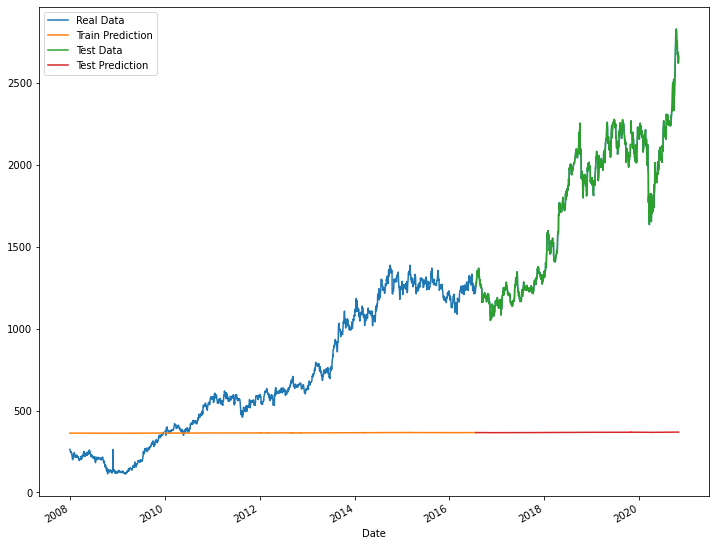

In [ ]:
fb['Close'].plot(legend=True,figsize=(12,10),label='Real Data')
train_fb['pred'].plot(legend=True,label='Train Prediction')
test_fb['Close'].plot(legend=True, label = 'Test Data')
test_fb['pred'].plot(legend=True,label='Test Prediction')

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
rmse(train_fb['pred'],train_fb['close'])

2.4877603335133283

# Prediction Into Future

In [ ]:
scaled_predictions = []
first_eval_batch = test[-n_inputs:]
current_batch=first_eval_batch.reshape((1,n_inputs,n_features))

for i in range(30):
    current_pred=model.predict(current_batch)[0]
    scaled_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

NameError: name 'n_features' is not defined

In [ ]:
true_predictions=scaler.inverse_transform(scaled_predictions)

In [ ]:
values=[]
for i in range(len(true_predictions)):
    values.append(true_predictions.astype(float)[i][0])

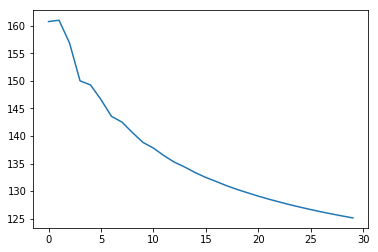

In [ ]:
plt.plot(values)

In [ ]:
fb1=pd.DataFrame(values,index=pd.date_range('2018-02-07',periods=30,freq="d"))

In [ ]:
fb2=fb.append(fb1)

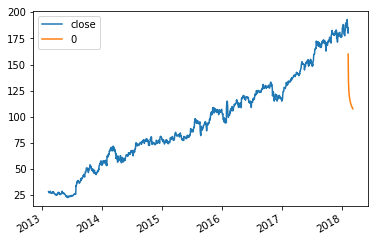

In [ ]:
fb2.plot()

# XGBooost


In [ ]:
lstm_model

In [ ]:
adab= AdaBoostClassifier(base_estimator=lstm_model,n_estimators=400,learning_rate=1)

In [ ]:
bm=adab.fit(train_fb['close'],train_fb['pred'])

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000001C5EC9BA2B0>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
type(test_fb['close'])

pandas.core.series.Series

In [ ]:
f=list(list(zip(train_fb['close'],train_fb['pred'])))

In [ ]:
f[0]

(28.545, 24.982555389404297)